## A* Search Code:

In [1]:
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install bresenham

In [3]:
import numpy as np
import PIL
import math
import matplotlib.pyplot as plt
import random
from queue import PriorityQueue
import networkx as nx
from bresenham import bresenham


In [4]:
#Function to obtain neighbours
def get_neighbours(node, grid):
    #setting the range of the grid
    x_limit_grid = grid.shape[0]
    y_limit_grid = grid.shape[1]
    N_list = []
    interval = [-1,0,1]
    for m in interval:
        for n in interval:
            if m==0 and n==0:
                continue
            current_x = node[0]
            current_y = node[1]
            if (current_x + m >=0) and (current_y + n >=0) and (current_x + m < x_limit_grid) and (current_y + n < y_limit_grid):
                if grid[current_x + m][current_y + n] !=0:
                    N_list.append([current_x + m , current_y + n])
            #print(N_list)
    return N_list

In [5]:
#Heuristic Function
def heuristic(v1, v2):
    return math.sqrt((v1[0]-v2[0])**2 + (v1[1]-v2[1])**2)

In [6]:
def if_present(Q, item):
    return any(item == m for m in Q.queue)

In [7]:
#Tracing the path back
def recover_path(v1 , v2, pred):
    retrive_path = []
    g = v2
    while g != v1:
        retrive_path.append(g)
        g = pred[g[0]][g[1]]
    retrive_path.append(v1)
    return retrive_path

In [8]:
#Plotting the path on the custom grid
def draw_path(grid, path, size):

  x_axis = grid.shape[0]
  y_axis = grid.shape[1]

  plt.figure(figsize=size)

  for m in range(x_axis):
    for n in range(y_axis):
      if grid[m][n] == 0:
        plt.plot(m, n, 'ko')
      elif [m,n] in path:
        plt.plot(m, n, 'ro')
      else:
        plt.plot(m, n, 'w.')
  plt.show()

In [9]:
# A* search
def Astarsearch(grid, s, g):
        
    rows = grid.shape[0]
    y_limit = grid.shape[1]

    CostTo = np.full((rows,y_limit), math.inf)
    EstTotalCost = np.full((rows,y_limit), math.inf)
    pred = np.empty((rows,y_limit), dtype = object)

    CostTo[s[0]][s[1]] = 0
    EstTotalCost[s[0]][s[1]] = heuristic(s,g)
    Q = PriorityQueue()
    Q.put( (heuristic(s,g),(s)))

  
    while not Q.empty():
        Node = Q.get()[1]

        if Node == g:
            return recover_path(s, g, pred)[::-1]
        for m in get_neighbours(Node, grid):
     
          pvi = CostTo[Node[0]][Node[1]] + heuristic(Node , m)
          if pvi < CostTo[m[0]][m[1]]:

            pred[m[0]][m[1]] = Node
            CostTo[m[0]][m[1]] = pvi
            EstTotalCost[m[0]][m[1]] = pvi + heuristic(m,g)


            if if_present(Q,m):
                Q.queue.remove(m)
            Q.put(((EstTotalCost[m[0]][m[1]]),(m)))
    return None

In [10]:
#Defining a grid to plot the path
custom_grid = [[1,1,0,1,0],[1,0,1,0,1],[1,0,0,1,0],[0,1,0,1,0],[0,1,0,1,1],[0,1,0,0,1]]
custom_grid = np.array(custom_grid)
plot_path = Astarsearch(custom_grid, [3,2], [0,0])
print(plot_path)

[[3, 2], [3, 1], [2, 0], [1, 0], [0, 0]]


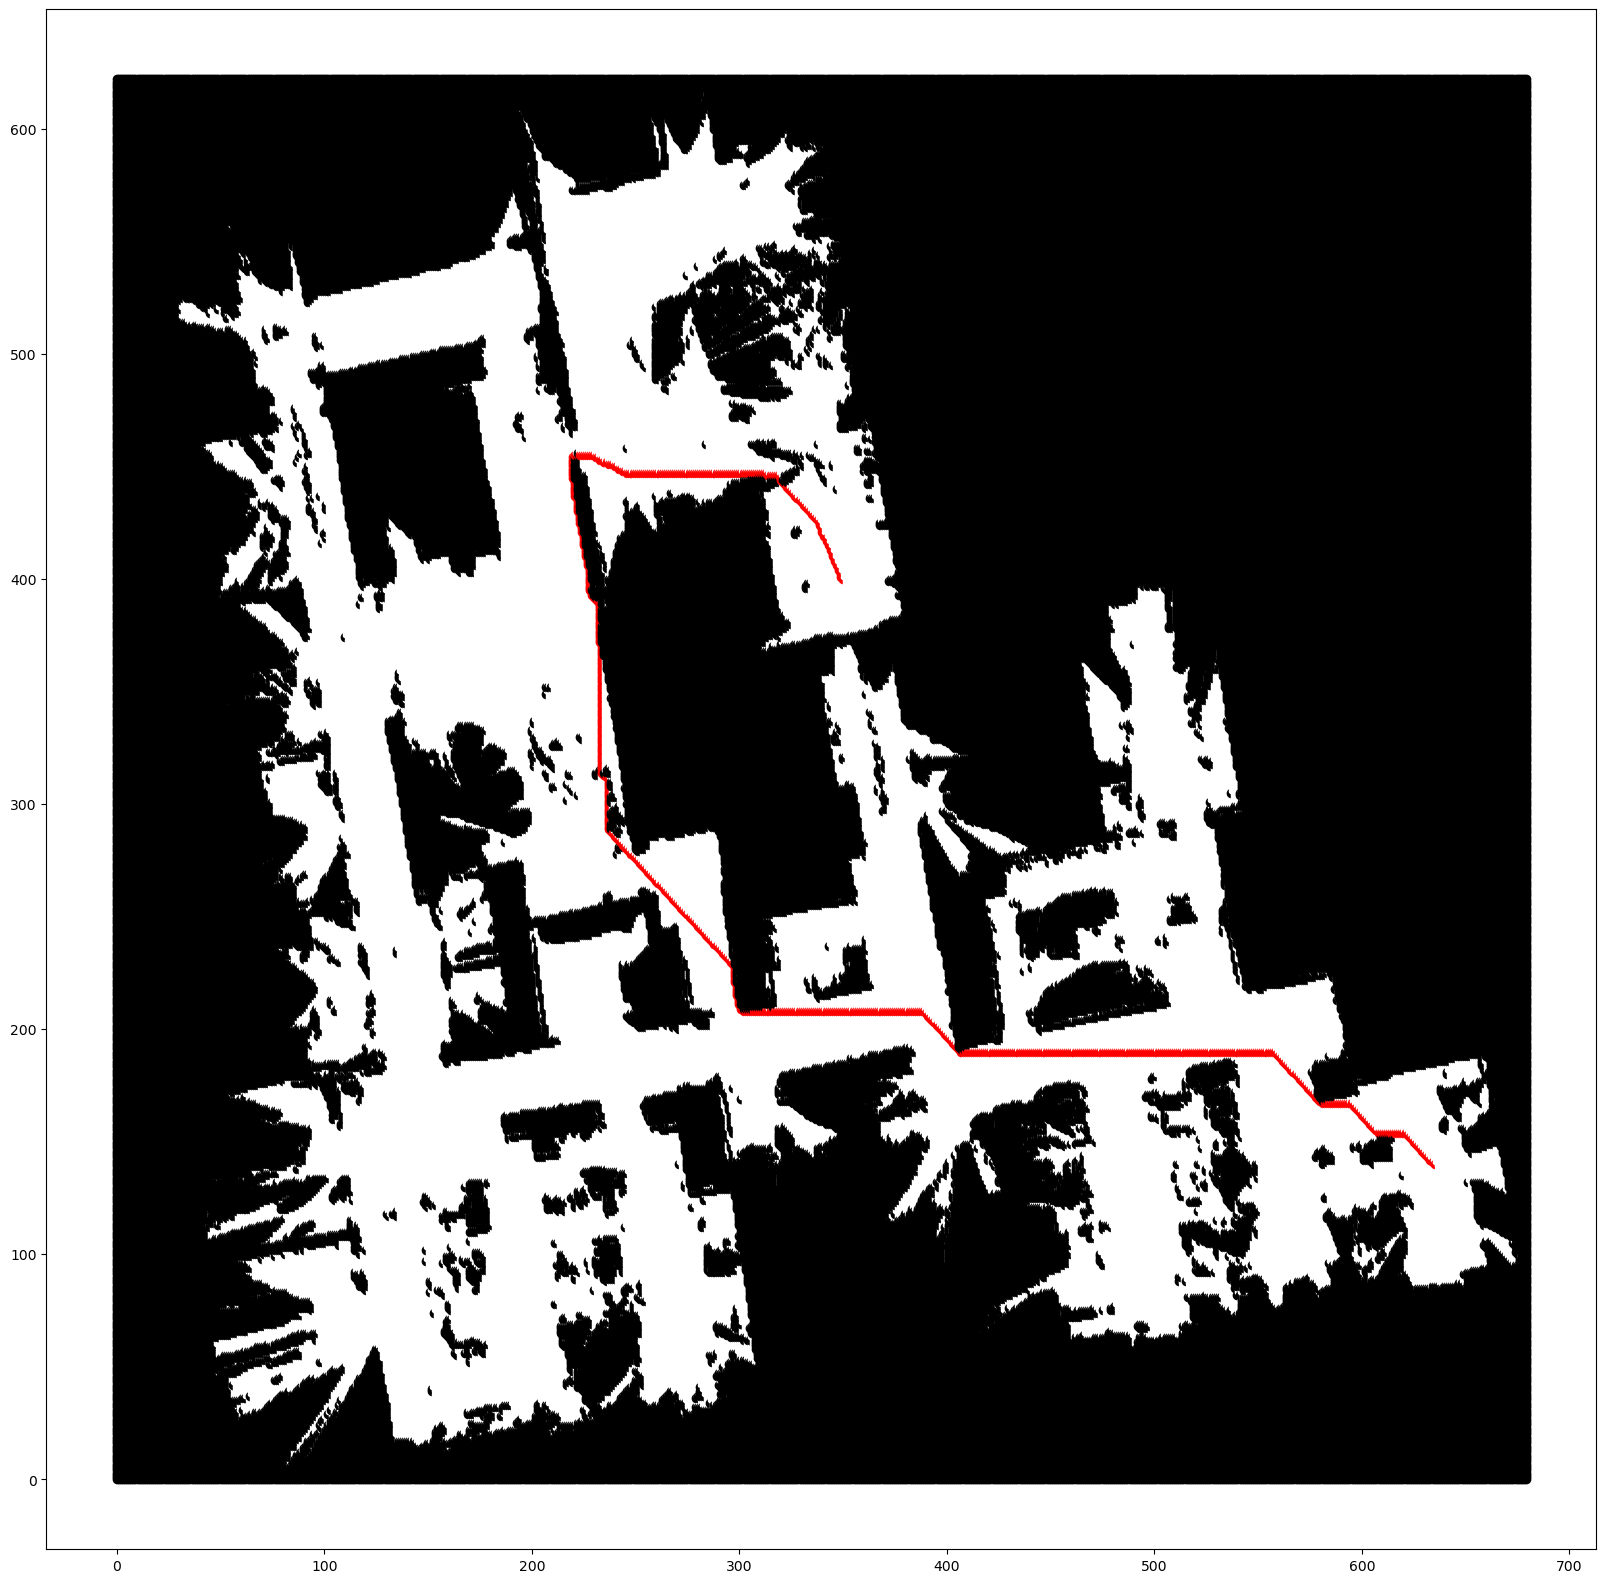

725


In [11]:
#Generating path using the given coordinates and measuring the path
occupancy_map_img = PIL.Image.open('occupancy_map.png')
occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)
plot_path = Astarsearch(occupancy_grid, [635,140], [350, 400])
draw_path(occupancy_grid, plot_path, size = (20,20))
Length_of_path = len(plot_path)
print(Length_of_path)


# PRM Code:

In [12]:
#Occupancy of the node
def vertex_taken(n, node):
    return(node[n]==0)

In [13]:
#Veryfying the path
def check_path(n1, n2, node):
    no_path = list(bresenham(n1[0],n1[1],n2[0],n2[1]))
    for n in no_path:
        if vertex_taken(n,node):
            return False
    return True

In [14]:
#Placing the nodes on the grid
def create_node(node, grid):
    x_limit = grid.shape[0]
    y_limit = grid.shape[1]
    while True:
        created_node = (int(np.random.uniform(low=0, high= x_limit)),
                     int(np.random.uniform(low=0, high=y_limit)))
        if not vertex_taken(created_node,node):
            return created_node

In [15]:
def add_node(N, prm,n_new,dmax):
    prm.add_node(prm.number_of_nodes()+1, pos = n_new)
    new_node_position = prm.number_of_nodes()
    for node in prm:
        V = prm.nodes[node]['pos']
        if ((heuristic(V, n_new)<= dmax) and check_path(V,n_new,N)):
            prm.add_edge(node,new_node_position,weight = heuristic(V, n_new))
    return new_node_position,prm

In [16]:
#Custom grid to check the path 
def generate_grid(node, grid):
    x_side = grid.shape[0]
    y_side = grid.shape[1]
    for m in  range(x_side):
        for n in range(y_side):
            node[(m,n)] = grid[m][n]
    return node

In [17]:
#Generatre PRM
def make_prm(node, grid, prm,N,dmax):
    for i in range(N):
        new_node = create_node(node, grid)
        new_node_position,prm = add_node(node, prm,new_node,dmax)
    return(prm)

In [18]:
#Probabilistic Road Map Algorithm and printing the path
node = {}
prm = nx.Graph()

gen_node = generate_grid(node, occupancy_grid)
N = 2500
dmax =75
    
prm = make_prm(gen_node, occupancy_grid, prm,N,dmax)
start,prm = add_node(gen_node, prm,(635,140),dmax)
goal,prm = add_node(gen_node, prm,(350,400),dmax)

node_path = nx.astar_path(prm,source = start, target = goal)
store_path=[]
for nodes in node_path:
    store_path.append(prm.nodes[nodes]['pos'])
print(store_path)

[(635, 140), (604, 161), (563, 171), (550, 184), (532, 190), (513, 191), (453, 188), (423, 187), (363, 196), (302, 207), (265, 264), (234, 291), (235, 305), (227, 376), (220, 433), (220, 459), (278, 455), (322, 451), (319, 438), (350, 400)]


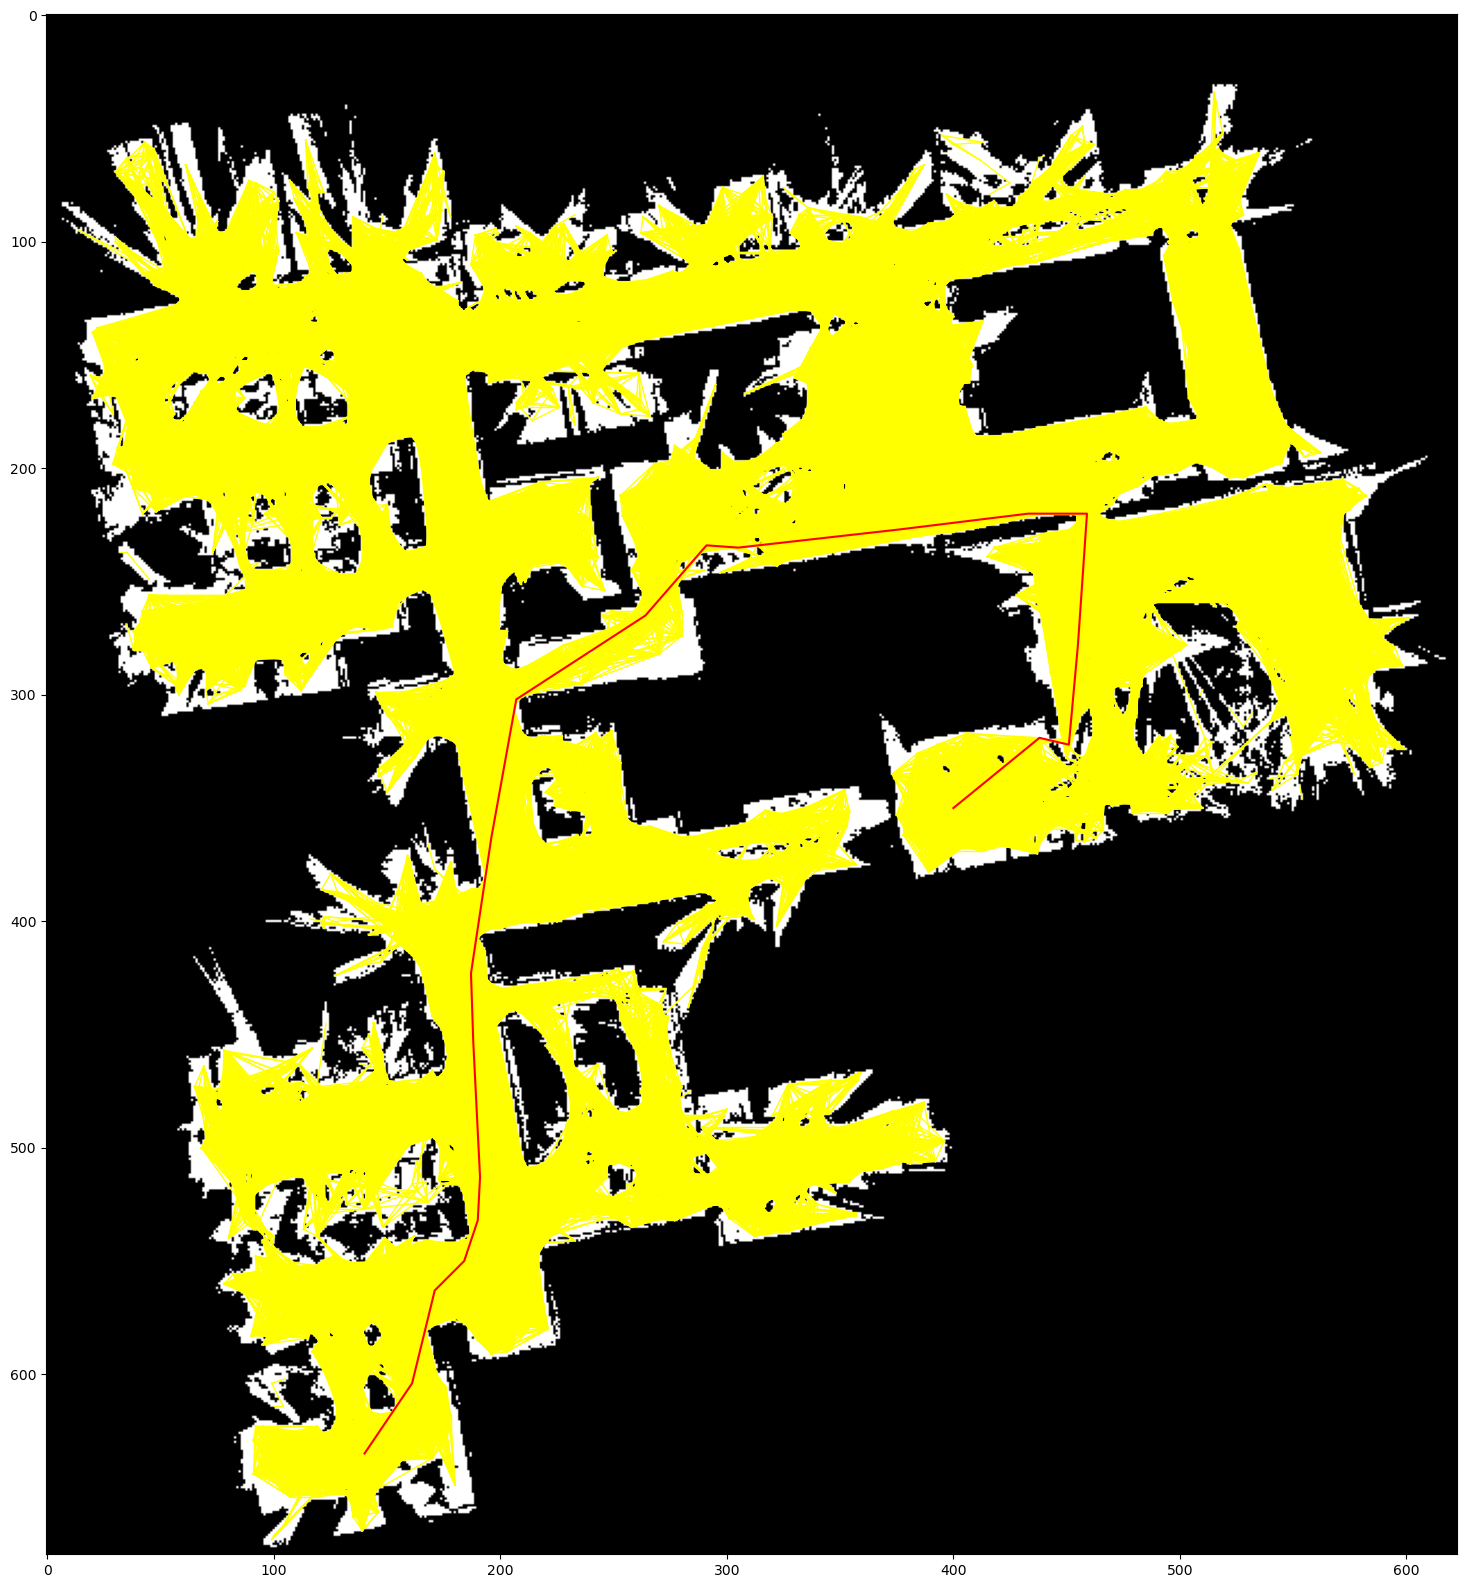

In [19]:
#Plot the path on the map
plt.figure(figsize=(20,20))
plt.imshow(occupancy_grid, cmap ='gray')
for (e1,e2) in prm.edges:
    plt.plot((prm.nodes[e1]['pos'][1],prm.nodes[e2]['pos'][1]),
             (prm.nodes[e1]['pos'][0],prm.nodes[e2]['pos'][0]),
             linewidth=1,
             color='yellow')
data = np.array(store_path)
plt.plot(data[:,1],data[:,0], color='red')
plt.show()
